<h1><center> Heart Disease Prediction </center> </h1>

<h2>Overview</h2>
This notebook will conduct a predictive modeling to forecast the presence of heart failure (variable
HeartDisease) based on demographics and medical data.

<h3> Dataset Description:</h3>
The "heart" dataset contains 12 features giving demographics and medical data for 918 subscriptions.

<h4> Features Description</h4>
<ol> 
    <li>Age: age of the patient [years]</li>
    <li>Sex: sex of the patient [M: Male, F: Female]</li>
    <li>ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</li>
    <li>RestingBP: resting blood pressure [mm Hg]</li>
    <li>Cholesterol: serum cholesterol [mm/dl]</li>
    <li>FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</li>
    <li>RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions   and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes'   criteria]</li>
    <li>MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]</li>
    <li>ExerciseAngina: exercise-induced angina [Y: Yes, N: No]</li>
    <li>Oldpeak: oldpeak = ST [Numeric value measured in depression]</li>
    <li>ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</li>
    <li><b><i>HeartDisease: output class [1: heart disease, 0: Normal]</i></b></li>
</ol>

<h2> Planning </h2>


   1. [Eploratory Data Analysis](#EDA)
   2. [Features Engineering](#Features_Engineering)
   3. [Modeling](#Modeling)
   4. [Model Evaluation and Selection](#Model_Evaluation_and_Selection)
  

In [1]:
# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for visualization
import seaborn as sns

#### Import the  <em>"heart"</em> dataset

In [2]:
#read the data 
df=pd.read_csv('heart.csv')

#Display the first 5 rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<a id="EDA"></a>
<h2>1. Exploratory data analysis (EDA):</h2>

##### a) Description, general information, data types, and shape of the dataset. 

In [3]:
#Display the shape of Dataset
df.shape

(918, 12)

As mentionned in the overview, the dataset contains 918 rows and 12 columns

In [4]:
#Description of the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We can observe the 5-numbers summary and the principle statistics data of the dataset. A priori, at least, one potential outlier in the feature Oldpeak (6.2 is suspecious value for a feature mean = 0.88 with almost no variation,std=1.07)

In [5]:
#general informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<ul> 
    <li>No missing or NaN values</li>
    <li>7 numerical features vs 5 categorical ones</li>
</ul>

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### b) The frequency of distinct values for each feature in the dataset.

In [7]:
columns=df.columns.tolist()
for col in columns:
    print(col,':\n')
    print('Val','Freq','\n')
    print(df[col].value_counts(),'\n')
   

Age :

Val Freq 

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64 

Sex :

Val Freq 

M    725
F    193
Name: Sex, dtype: int64 

ChestPainType :

Val Freq 

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

RestingBP :

Val Freq 

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64 

Cholesterol :

Val Freq 

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1


#### c) Distribution of all features:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

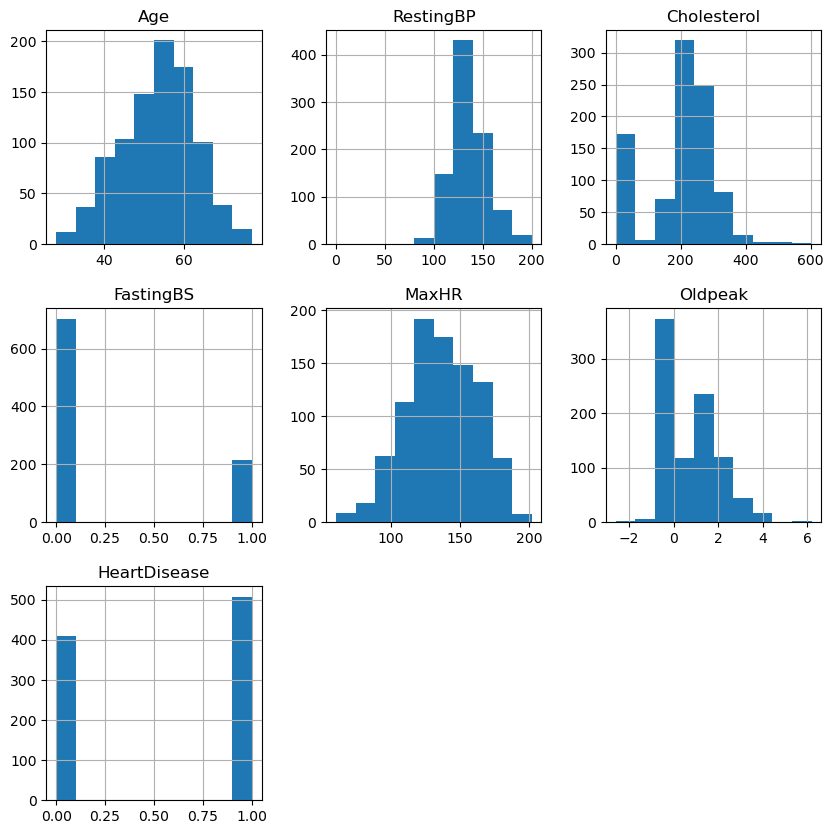

In [8]:
df.hist(figsize = (10, 10))


#### d) Correlation matrix to check for correlation between predictor variables:

<AxesSubplot:>

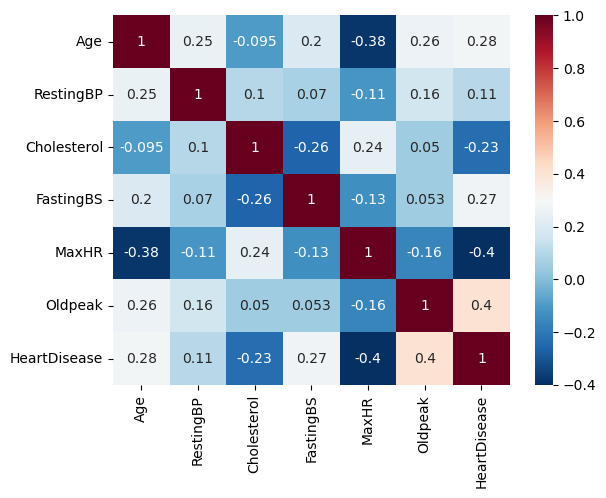

In [9]:
# Plot heatmap of annotated correlations
sns.heatmap(df.corr(), annot=True, cmap = 'RdBu_r')

##### dropping features with correlatio>0.5

In [10]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

<a id="Features_Engineering"></a>
<h2>2. Features Engineering:</h2>

#### a) Check and drop duplicate and missing values, if it’s the case.

In [11]:
#check duplicate values
duplicates = df[df.duplicated()]
if len(duplicates) == 0:
    print('No duplicated data')
else:
    print('Duplicated data found in rows:')
    print(duplicates.index.tolist())


No duplicated data


In [12]:
# Check for missing values
missing_values = df.isna()


# Display indexes of missing values or "no value is missing" if none found
if missing_values.any().any():
    print(missing_values.index[missing_values.any()])
else:
    print("no value is missing")


no value is missing


#### b) Check and manage imbalanced classes

1    508
0    410
Name: HeartDisease, dtype: int64


<AxesSubplot:>

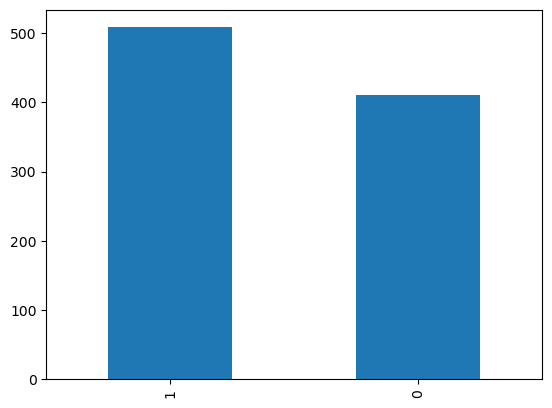

In [13]:
# Count the number of occurrences of each class
class_counts = df['HeartDisease'].value_counts()

# Print the class counts
print(class_counts)

class_counts.plot(kind='bar')

classes look balanced

#### b) Check and manage outliers

<AxesSubplot:>

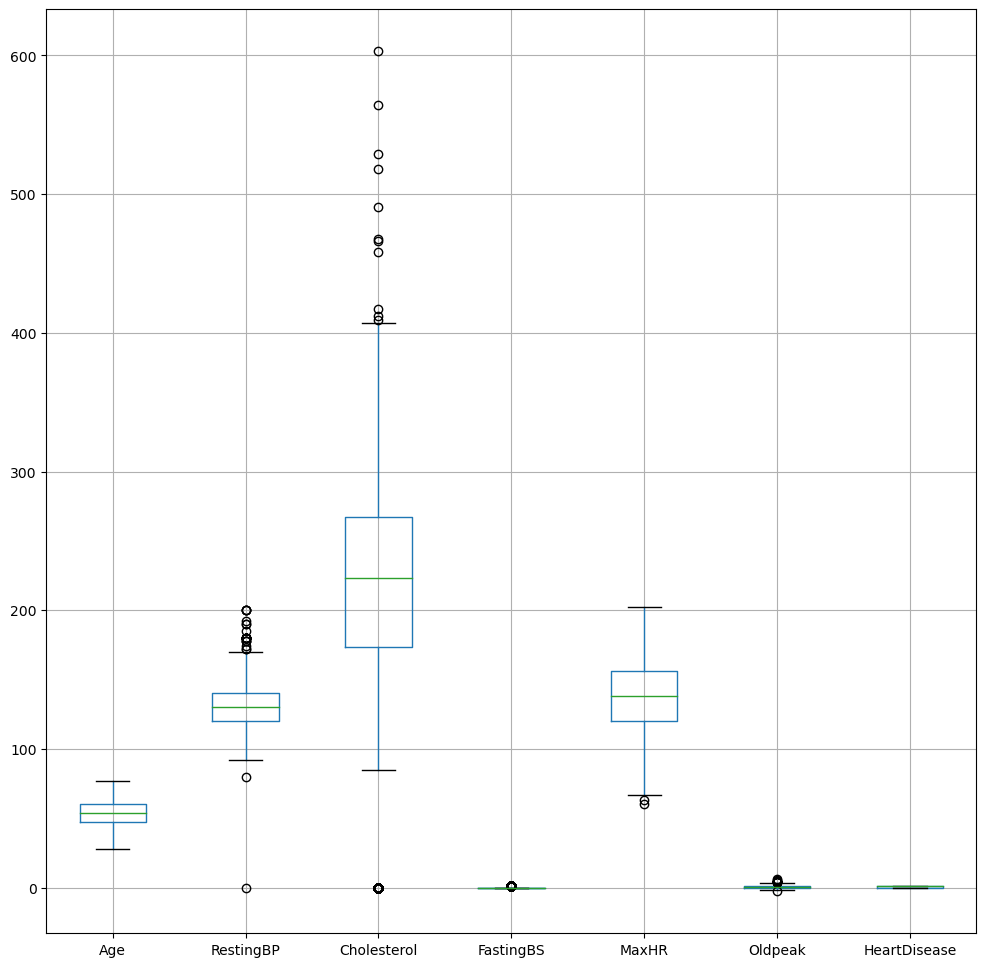

In [14]:
df.boxplot(figsize = (12,12))

It seems that Cholesterol feature has some outliers and from the Dataset description above we noticed that Oldpeak has too. This graph cannot confirm Oldpeak's outliers.Let's plot it apart

<AxesSubplot:xlabel='Oldpeak'>

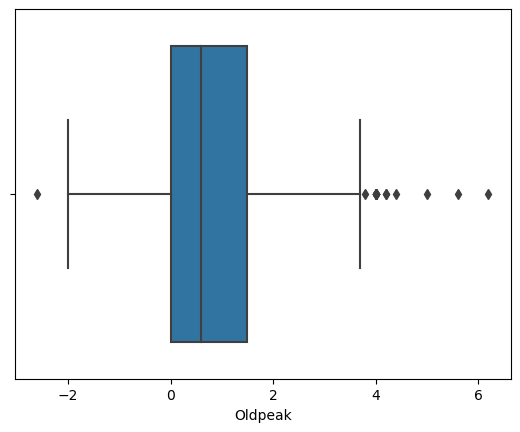

In [15]:
sns.boxplot(x='Oldpeak', data=df)

For Cholesterol feature we will use z-score transformation

<AxesSubplot:xlabel='Cholesterol'>

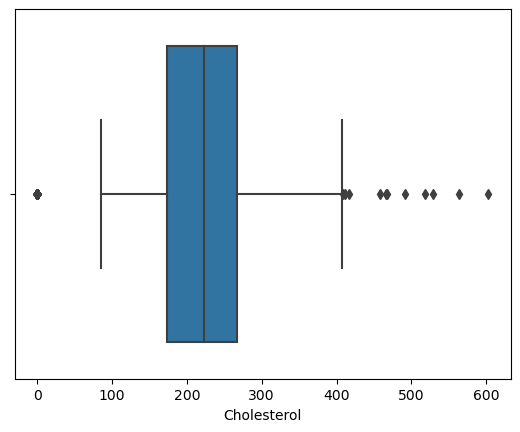

In [16]:
from scipy import stats

# Compute the z-score for the Cholesterol feature
chol = df['Cholesterol']
z_scores = stats.zscore(chol)

# Define a threshold for extreme values
threshold = 2

# Replace extreme values with the mean value
cholesterol_clean = chol.copy()
cholesterol_clean[z_scores > threshold] = chol.mean()

#Verifying the outliers for the new column
sns.boxplot(x='Cholesterol',data=df)



<AxesSubplot:xlabel='Cholesterol'>

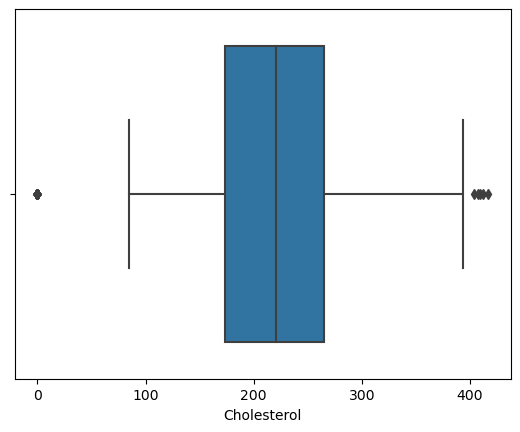

In [17]:
sns.boxplot(x=cholesterol_clean)

In [18]:
# Replace the original feature with the cleaned version
df['Cholesterol'] = cholesterol_clean

For 'Oldpeak' feature, we will replace outliers with the median value

<AxesSubplot:xlabel='Oldpeak'>

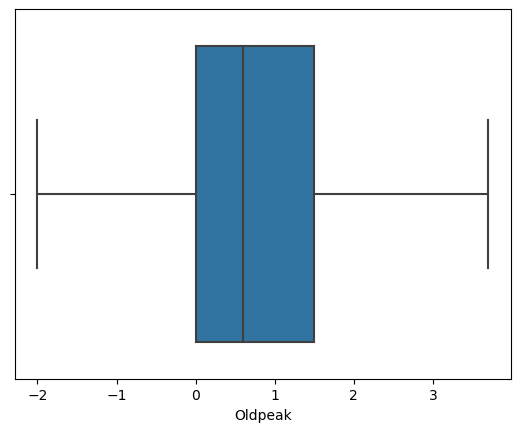

In [19]:
# Calculate the median of the Oldpeak feature
median = df['Oldpeak'].median()

# Replace the outliers with the median
q1, q3 = np.percentile(df['Oldpeak'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['Oldpeak'] = np.where(df['Oldpeak'] < lower_bound, median, df['Oldpeak'])
df['Oldpeak'] = np.where(df['Oldpeak'] > upper_bound, median, df['Oldpeak'])

#Visualizing the new feature
sns.boxplot(x='Oldpeak', data=df)

#### c) Converting categorical to numeric data using onehot encoding 

In [20]:
df.head(1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0


In [21]:
# Convert categorical features into numerical features using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope'])

In [22]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214.0,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195.0,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

We notice that all features have a numeric data type

#### d) Rescaling features using a standardization function

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler
scaler = MinMaxScaler()

# Rescale all the features in the dataset
df[df.columns] = scaler.fit_transform(df[df.columns])

# Verify the rescaled features
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.661983,0.470190,0.233115,0.540911,0.496388,0.553377,0.210240,0.789760,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.595861,0.404139,0.068627,0.501089,0.430283
std,0.192502,0.092571,0.252432,0.423046,0.179298,0.168072,0.497414,0.407701,0.407701,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.490992,0.490992,0.252957,0.500271,0.495386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,0.600000,0.415468,0.000000,0.422535,0.350877,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,0.650000,0.529976,0.000000,0.549296,0.456140,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.653061,0.700000,0.635492,0.000000,0.676056,0.614035,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="Modeling"></a>
<h2>3. Modeling:</h2>

#### a) Splitting the dataset into test and training

In [25]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the features
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (642, 20)
y_train shape: (642,)
X_test shape: (276, 20)
y_test shape: (276,)


#### b) Use KNN, SVM, and Decision Tree Classifier classifiers to predict the class

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create classifiers
knn = KNeighborsClassifier()
svm = SVC()
dtc = DecisionTreeClassifier()

# Fit the classifiers to the training data
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
dtc.fit(X_train, y_train)

# Make predictions on the test data
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
dtc_pred = dtc.predict(X_test)

# Calculate and print the accuracy of each classifier
knn_acc = accuracy_score(y_test, knn_pred)
svm_acc = accuracy_score(y_test, svm_pred)
dtc_acc = accuracy_score(y_test, dtc_pred)

print("KNN accuracy:", knn_acc)
print("SVM accuracy:", svm_acc)
print("Decision Tree Classifier accuracy:", dtc_acc)


KNN accuracy: 0.8405797101449275
SVM accuracy: 0.8623188405797102
Decision Tree Classifier accuracy: 0.7427536231884058


C:\Users\maroi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


a comparative report

In [27]:
from sklearn.metrics import classification_report

# Generate a classification report for the KNN classifier
print("KNN classification report:")
print(classification_report(y_test, knn_pred))

# Generate a classification report for the SVM classifier
print("SVM classification report:")
print(classification_report(y_test, svm_pred))

# Generate a classification report for the Decision Tree Classifier
print("Decision Tree Classifier classification report:")
print(classification_report(y_test, dtc_pred))


KNN classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       112
         1.0       0.90      0.82      0.86       164

    accuracy                           0.84       276
   macro avg       0.83      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276

SVM classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       112
         1.0       0.91      0.85      0.88       164

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.87      0.86      0.86       276

Decision Tree Classifier classification report:
              precision    recall  f1-score   support

         0.0       0.65      0.79      0.71       112
         1.0       0.83      0.71      0.77       164

    accuracy                           0.74       276
   macro avg       0.74   

<a id="Model_Evaluation_and_Selection"></a>
<h2>4. Model Evaluation and Selection:</h2>

#### a) Finding the best estimators using GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dtc = DecisionTreeClassifier()

# Define the hyperparameters to search over
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create a GridSearchCV object to search over the hyperparameters
grid_search = GridSearchCV(estimator=dtc, param_grid=params, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)


Best hyperparameters:
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}


#### b) Running the model with the best hyperparameters

In [29]:

# Create a Decision Tree Classifier object with the best hyperparameters
dtcBest = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                 max_depth=grid_search.best_params_['max_depth'],
                                 min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

# Fit the Decision Tree Classifier to the training data
dtcBest.fit(X_train, y_train)

# Get predictions on the test data
y_predBest = dtcBest.predict(X_test)


We can display the confusion matrix and classification report

In [30]:
from sklearn.metrics import confusion_matrix
# Create a confusion matrix
cm = confusion_matrix(y_test, y_predBest)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Create a classification report
cr = classification_report(y_test, y_predBest)

# Print the classification report
print("Classification Report:")
print(cr)

Confusion Matrix:
[[ 93  19]
 [ 16 148]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       112
         1.0       0.89      0.90      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



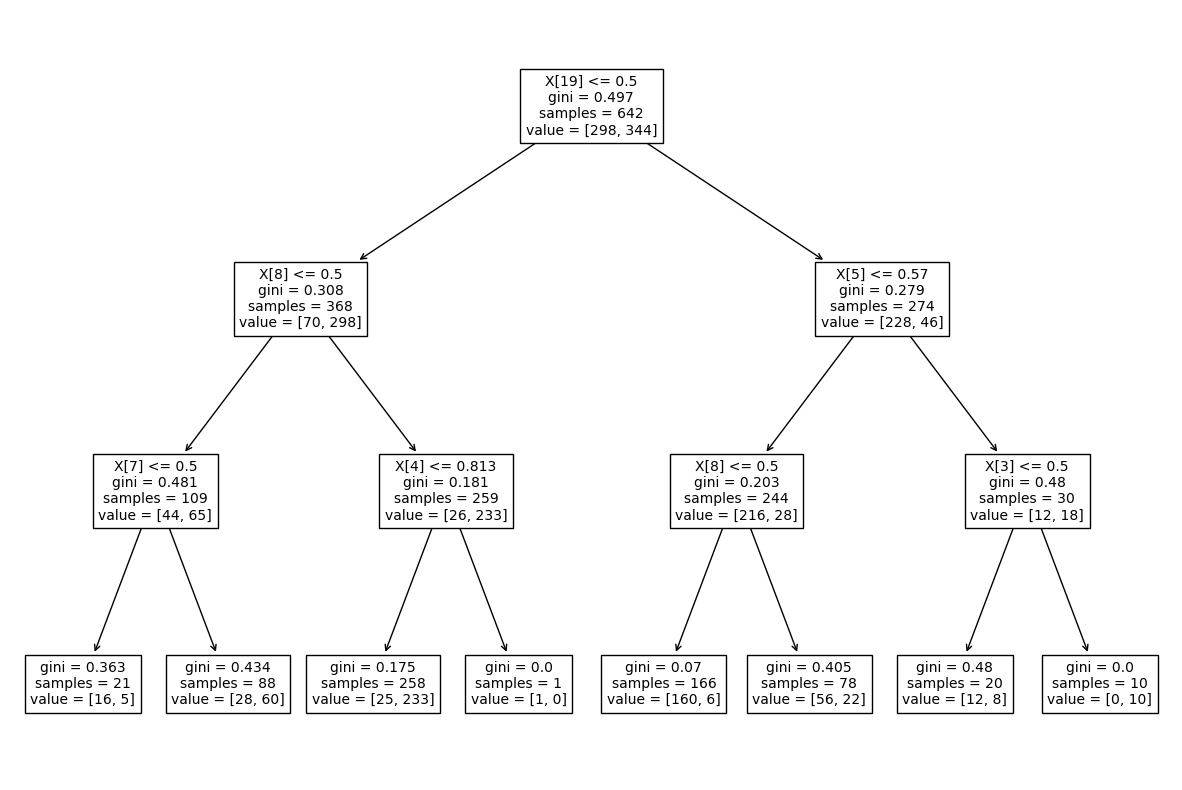

In [31]:
from sklearn.tree import plot_tree
# Create a decision tree classifier with max_depth=3
dtcBest = DecisionTreeClassifier(max_depth=3)

# Fit the classifier to the training data
dtcBest.fit(X_train, y_train)
plt.figure(figsize=(15,10)) # Set the figure size to 10x8 inches
plot_tree(dtcBest,fontsize=10)

# Show the plot
plt.show()

#### c) Comparison with previous results

<p>a big improvement in performance compared to the prediction made earlier</p>
<p>
previous:<br>
    recall=0.80&emsp;f1-score=0.72&emsp;accuracy=0.75
</p>
<p>
actual:<br>
    recall=0.83&emsp;f1-score=0.84&emsp;accuracy=0.88
</p>    

#### c) Plot the ROC graph for each model and compare the performance for each one

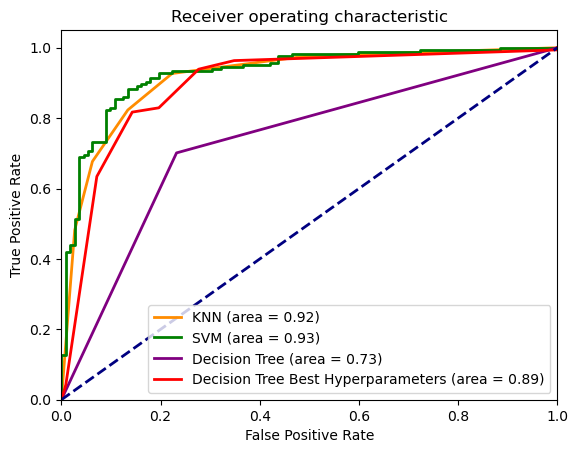

In [32]:

from sklearn.metrics import roc_curve, auc

# Fit the classifiers to the training data
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
dtc.fit(X_train, y_train)
dtcBest.fit(X_train, y_train)

# Obtain predicted probabilities on the test set using decision_function method
knn_prob = knn.predict_proba(X_test)[:, 1]
svm_prob = svm.decision_function(X_test)
dtc_prob = dtc.predict_proba(X_test)[:, 1]
dtcBest_prob = dtcBest.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds for each classifier
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_prob)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_prob)
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_prob)
dtcBest_fpr, dtcBest_tpr, dtcBest_thresholds = roc_curve(y_test, dtcBest_prob)

# Calculate area under ROC curve for each classifier
knn_auc = auc(knn_fpr, knn_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
dtc_auc = auc(dtc_fpr, dtc_tpr)
dtcBest_auc = auc(dtcBest_fpr, dtcBest_tpr)

# Plot ROC curve for each classifier
plt.plot(knn_fpr, knn_tpr, color='darkorange', lw=2, label='KNN (area = %0.2f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label='SVM (area = %0.2f)' % svm_auc)
plt.plot(dtc_fpr, dtc_tpr, color='purple', lw=2, label='Decision Tree (area = %0.2f)' % dtc_auc)
plt.plot(dtcBest_fpr, dtcBest_tpr, color='red', lw=2, label='Decision Tree Best Hyperparameters (area = %0.2f)' % dtcBest_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


We use the predict_proba method for KNN and Decision Tree, and the decision_function method for SVM to obtain predicted probabilities on the test set. 

#### d) Which is the best model according to each criterion

According to accuracy from the previous task, we notice that the DT model with best Hyperparameters (0.88) is N°1 slightly ahead SVM model (0.86). However, according to the AUC values, we notice that SVM is highly better. This is said, a model using SVM classifier should be the best choice for our case of study